The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/accidents/US_Accidents_March23_sampled_500k.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

**SEVERITY ON TRAFFIC ANALYSIS**

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df_traffic= df[['ID', 'Severity', 'City', 'State', 'Temperature(F)', 
                 'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing',
                'Junction', 'Roundabout', 'Traffic_Signal','Sunrise_Sunset' ]]
hi hi
print(df_traffic.shape)
df_traffic.head()

(500000, 14)


,ID,Severity,City,State,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Bump,Crossing,Junction,Roundabout,Traffic_Signal,Sunrise_Sunset
0,A-2047758,2,Zachary,LA,77.0,10.0,0.0,Fair,False,False,False,False,True,Day
1,A-4694324,2,Sterling,VA,45.0,10.0,0.0,Fair,False,False,False,False,False,Night
2,A-5006183,2,Lompoc,CA,68.0,10.0,0.0,Fair,False,False,False,False,True,Day
3,A-4237356,2,Austin,MN,27.0,10.0,0.0,Wintry Mix,False,False,False,False,False,Day
4,A-6690583,2,Bakersfield,CA,42.0,10.0,0.0,Fair,False,False,False,False,False,Night


In [8]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 500000 non-null  object 
 1   Severity           500000 non-null  int64  
 2   City               499981 non-null  object 
 3   State              500000 non-null  object 
 4   Temperature(F)     489534 non-null  float64
 5   Visibility(mi)     488709 non-null  float64
 6   Precipitation(in)  357384 non-null  float64
 7   Weather_Condition  488899 non-null  object 
 8   Bump               500000 non-null  bool   
 9   Crossing           500000 non-null  bool   
 10  Junction           500000 non-null  bool   
 11  Roundabout         500000 non-null  bool   
 12  Traffic_Signal     500000 non-null  bool   
 13  Sunrise_Sunset     498517 non-null  object 
dtypes: bool(5), float64(3), int64(1), object(5)
memory usage: 36.7+ MB


DATA CLEANING

In [9]:
!pip install us
import us

# Function to convert state code to state name
def convert_state_code(code):
    state = us.states.lookup(code)
    return state.name if state else 'Unknown'

df_traffic['State'] = df_traffic['State'].apply(convert_state_code)
df_traffic['State'].head()

/tmp/ipykernel_559/1467958365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic['State'] = df_traffic['State'].apply(convert_state_code)


0     Louisiana
1      Virginia
2    California
3     Minnesota
4    California
Name: State, dtype: object

In [10]:
df_traffic.describe()

,Severity,Temperature(F),Visibility(mi),Precipitation(in)
count,500000.000000,489534.000000,488709.000000,357384.000000
mean,2.212748,61.646254,9.091540,0.008289
std,0.486661,19.000133,2.708083,0.101865
min,1.000000,-77.800000,0.000000,0.000000
25%,2.000000,49.000000,10.000000,0.000000
50%,2.000000,64.000000,10.000000,0.000000
75%,2.000000,76.000000,10.000000,0.000000
max,4.000000,207.000000,130.000000,10.130000


In [11]:
df_traffic.select_dtypes(include='object').nunique()

ID                   500000
City                   9488
State                    49
Weather_Condition       108
Sunrise_Sunset            2
dtype: int64

*from the description, there are potential outliers that should be sorted*

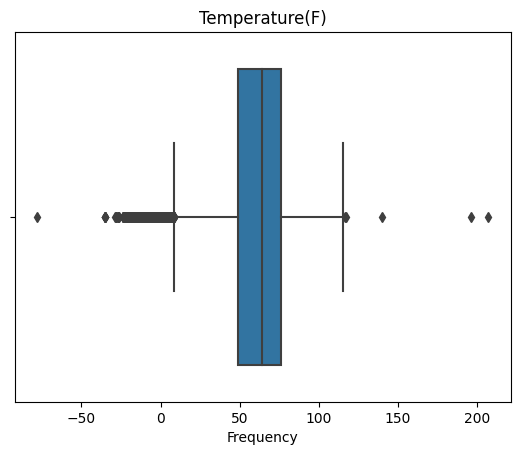

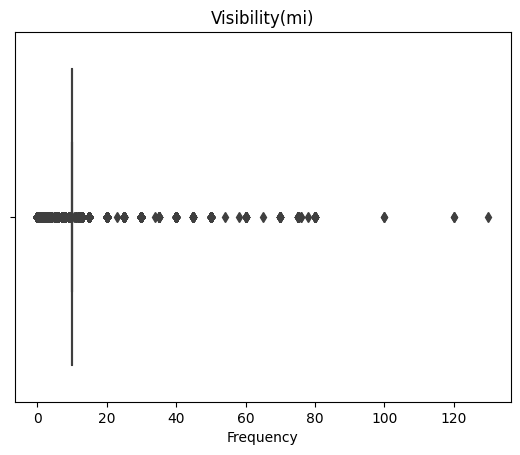

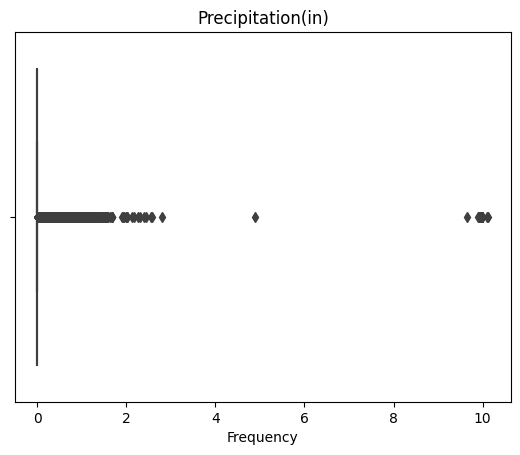

In [12]:
def boxPlot(column):
  sns.boxplot(x=df[column], orient='h')

  plt.title(column)
  plt.xlabel('Frequency')
  plt.show()

data = df_traffic.select_dtypes(include = 'number').columns
for col in data[1:]:
  boxPlot(col)

In [13]:
# Handling Temperature Outlier
df_traffic['Temperature(F)'].sort_values(ascending=False)
high_temp = df_traffic['Temperature(F)'] <=134
low_temp = df_traffic['Temperature(F)'] >= -70
mask_temp = high_temp & low_temp

df_traffic = df_traffic[mask_temp]

In [14]:
# Handling Visibility Outlier
mask_vi = df_traffic['Visibility(mi)'] < 40
df_traffic = df_traffic[mask_vi]
df_traffic.describe()

,Severity,Temperature(F),Visibility(mi),Precipitation(in)
count,486633.000000,486633.000000,486633.000000,353934.000000
mean,2.211926,61.671944,9.059669,0.008129
std,0.485610,18.983950,2.404844,0.093752
min,1.000000,-35.000000,0.000000,0.000000
25%,2.000000,49.000000,10.000000,0.000000
50%,2.000000,64.000000,10.000000,0.000000
75%,2.000000,76.000000,10.000000,0.000000
max,4.000000,117.000000,35.000000,10.130000


In [15]:
# Handling Nan Values
df_traffic.isnull().sum()

ID                        0
Severity                  0
City                     18
State                     0
Temperature(F)            0
Visibility(mi)            0
Precipitation(in)    132699
Weather_Condition      1090
Bump                      0
Crossing                  0
Junction                  0
Roundabout                0
Traffic_Signal            0
Sunrise_Sunset         1305
dtype: int64

In [16]:
df_traffic = df_traffic.dropna(subset=['City', 'Weather_Condition', 'Sunrise_Sunset'])

df_traffic['Precipitation(in)'] = df_traffic['Precipitation(in)'].fillna(df_traffic['Precipitation(in)'].median())

df_traffic.isnull().sum()


ID                   0
Severity             0
City                 0
State                0
Temperature(F)       0
Visibility(mi)       0
Precipitation(in)    0
Weather_Condition    0
Bump                 0
Crossing             0
Junction             0
Roundabout           0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

EDA

In [17]:
class_counts = df_traffic['Severity'].value_counts()
total_count = len(df_traffic)
percentage = (class_counts / total_count) * 100

print(percentage)
     

Severity
2    79.650173
3    16.936023
4     2.553692
1     0.860111
Name: count, dtype: float64


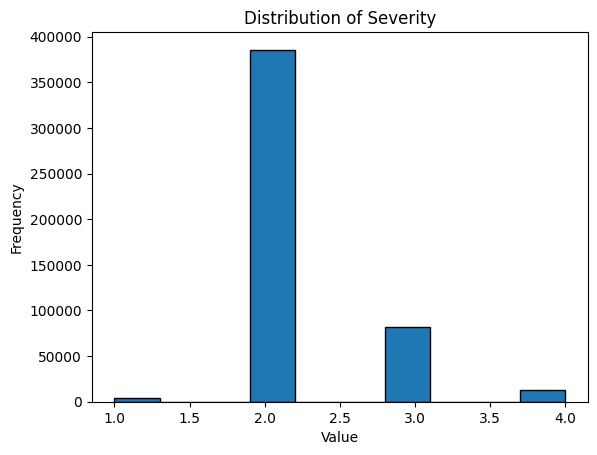

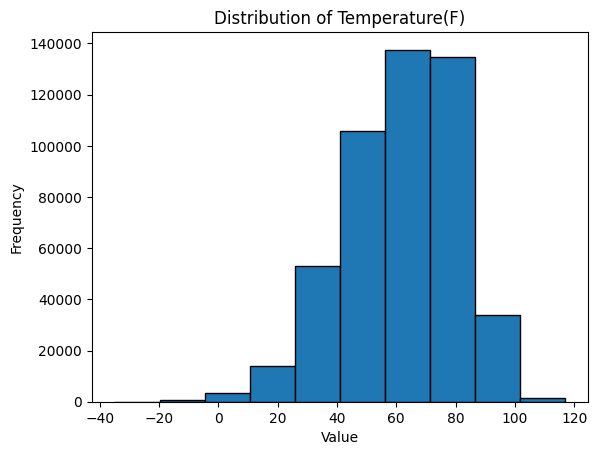

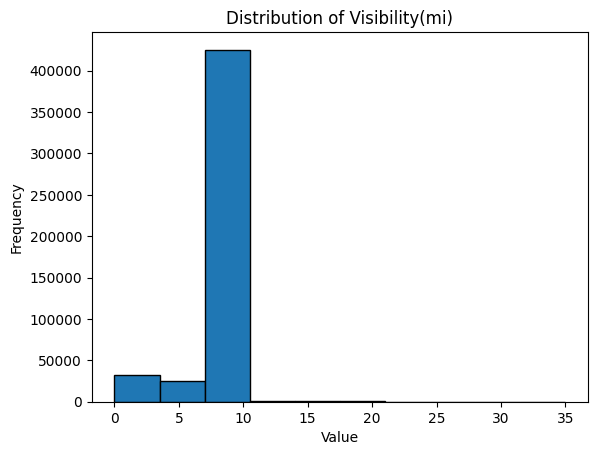

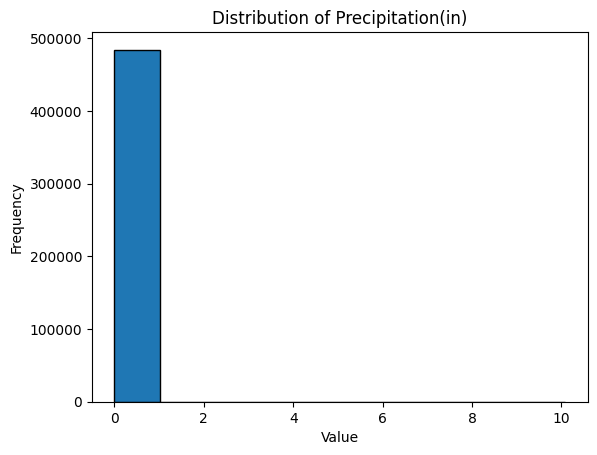

In [18]:
def hist(data, title):
  figsize = (10,5)
  plt.hist(data, bins=10, edgecolor='black')
  plt.title(title)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

data = df_traffic.select_dtypes(include='number').columns

for col in data:
  hist(data=df_traffic[col], title= f'Distribution of {col}')

*It is observed that:

* *Majority of the accidents have MODERATE delay impact on Traffic*
* *Majority of accidents occured on days with Temperature between 40°F and 100°F, typically during Spring, Summer and Fall*
*  *Majority of the accidents occured when there were 0-10miles visibilty*
*  *Majority of the accidents occured when there was 0in precipitation which implies that the weather was dry, with no rain, snow, sleet, or any other form of precipitation.*

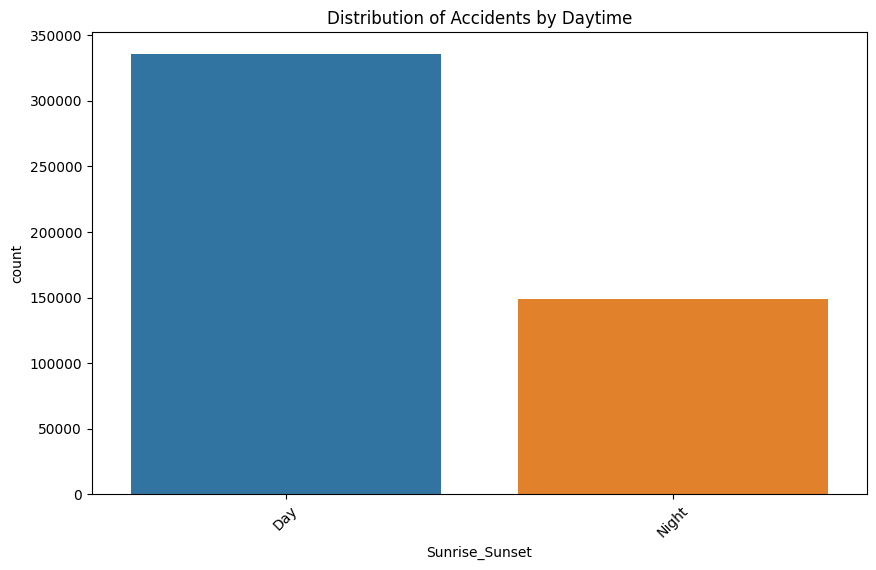

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_traffic['Sunrise_Sunset'])
plt.xticks(rotation=45)
plt.title(f'Distribution of Accidents by Daytime')
plt.show()

*More accidents occured during Daytime*

In [20]:
data = ['Bump', 'Crossing', 'Junction', 'Roundabout', 'Traffic_Signal']
for col in data:
    class_counts = df_traffic[col].value_counts()
    total_count = len(df_traffic)
    percentage = (class_counts / total_count) * 100

    print(percentage)

Bump
False    99.95684
True      0.04316
Name: count, dtype: float64
Crossing
False    88.626094
True     11.373906
Name: count, dtype: float64
Junction
False    92.607385
True      7.392615
Name: count, dtype: float64
Roundabout
False    99.997315
True      0.002685
Name: count, dtype: float64
Traffic_Signal
False    85.072485
True     14.927515
Name: count, dtype: float64


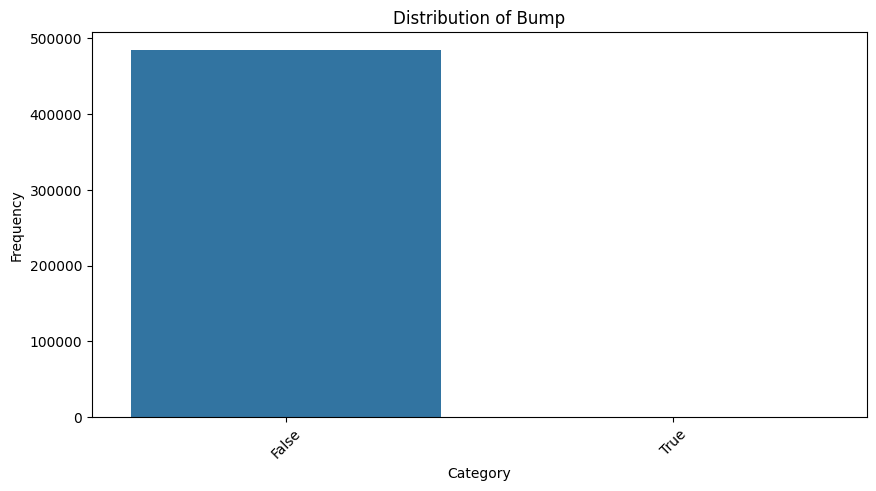

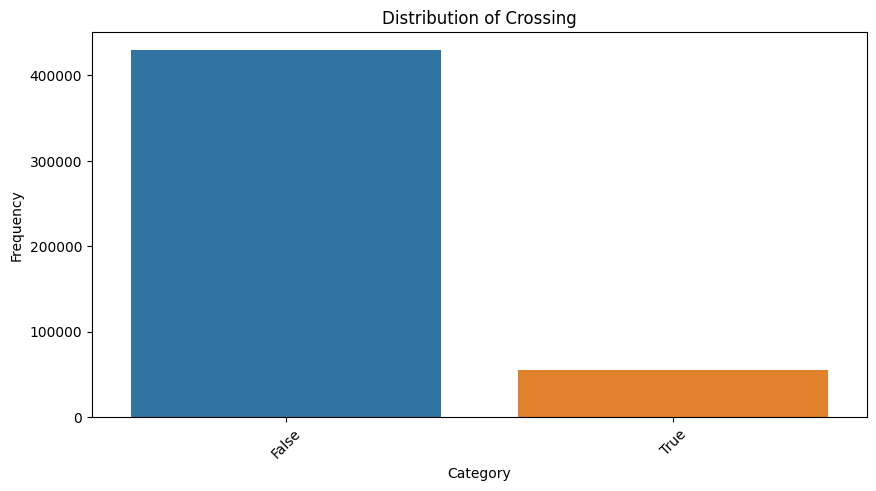

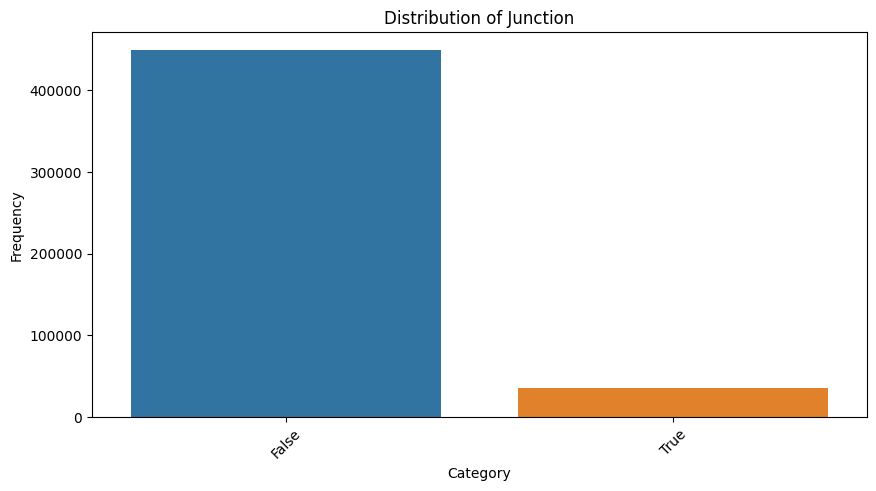

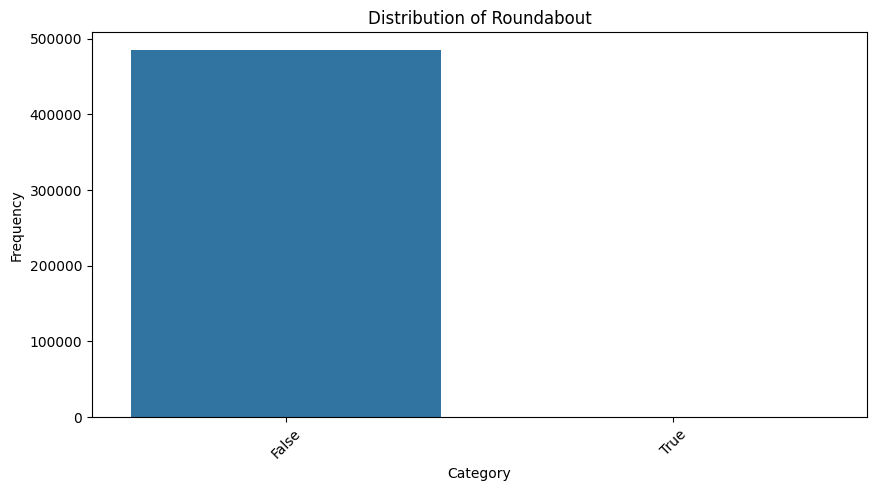

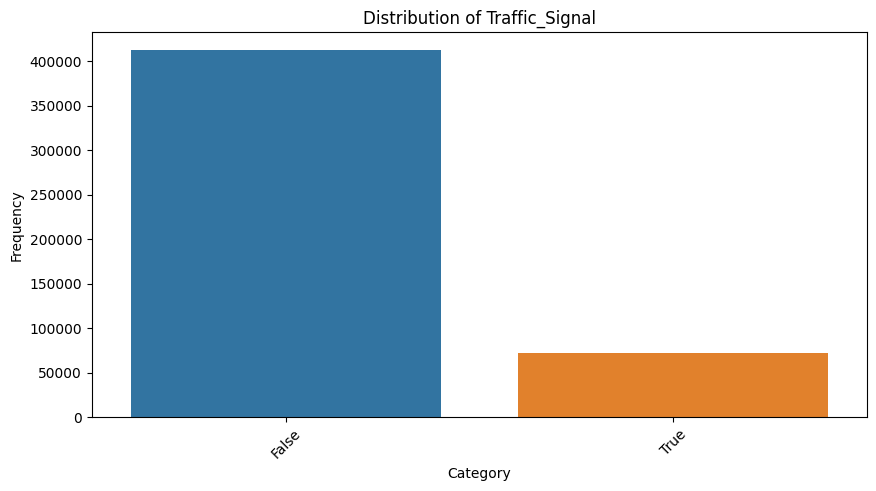

In [21]:
def bar_plot(data, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data)
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# List of categorical columns
data_columns = ['Bump', 'Crossing', 'Junction', 'Roundabout', 'Traffic_Signal']

# Loop through the columns and plot bar charts
for col in data_columns:
    bar_plot(data=df_traffic[col], title=f'Distribution of {col}')

* Over 99% of accidents occur on roads without Road Bumps
* About 11% of accidents occur on roads near Pedastrian Crossings
* About 7% of accidents occur on roads with a Junction nearby
* Almost no accident occur on Roundabouts
* About 85% of accidents occur on road where Traffic Signals are absent

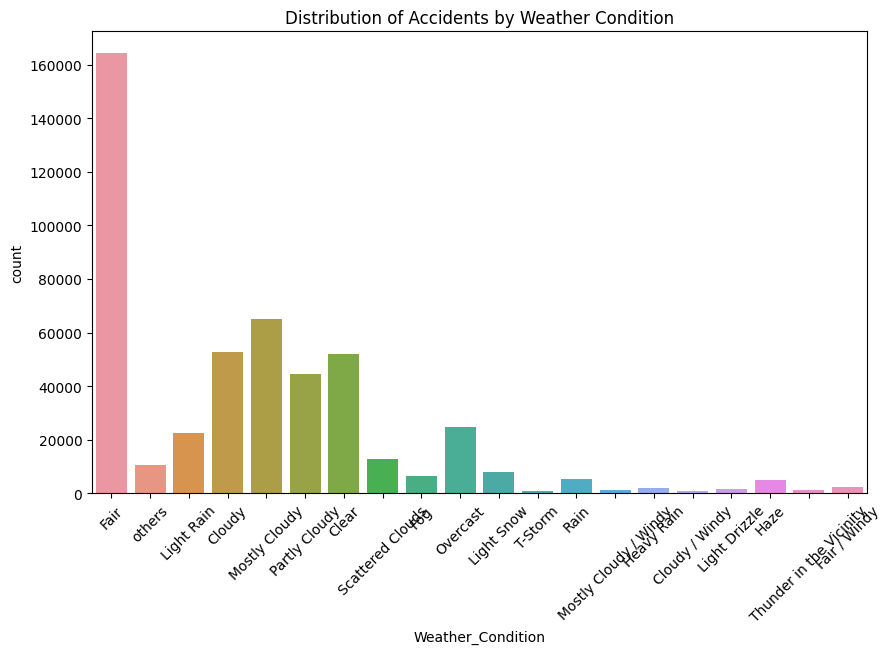

In [22]:
def merge_small_categories(df, column_name, threshold=1000):
    value_counts = df[column_name].value_counts()
    to_merge = value_counts[value_counts < threshold].index
    df[column_name] = df[column_name].replace(to_merge, 'others')
    
    return df

merge_small_categories(df_traffic, 'Weather_Condition', threshold=1000)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_traffic['Weather_Condition'])
plt.xticks(rotation=45)
plt.title(f'Distribution of Accidents by Weather Condition')
plt.show()


*Most accidents have occured when the weather_condotion is 'Fair'*

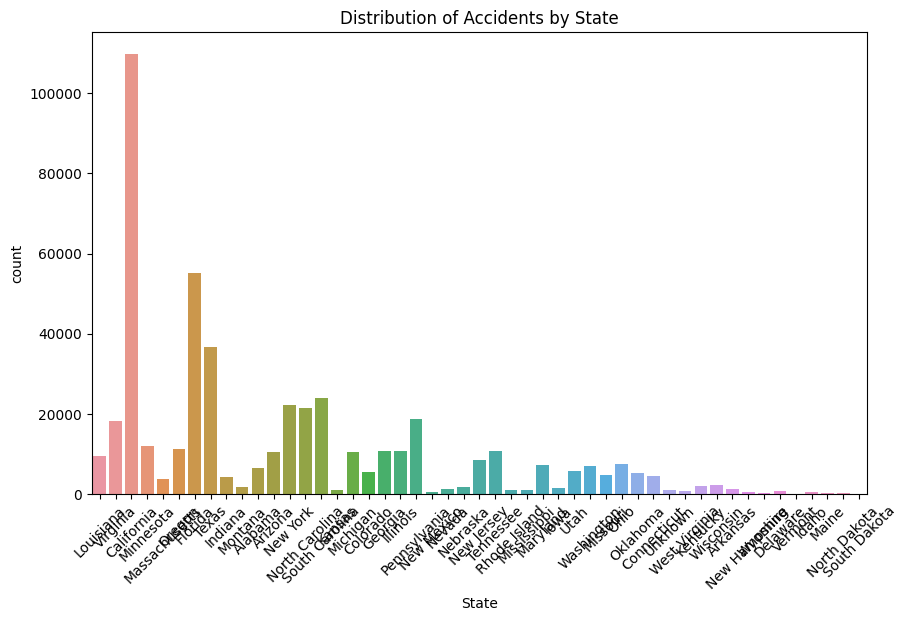

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_traffic['State'])
plt.xticks(rotation=45)
plt.title(f'Distribution of Accidents by State')
plt.show()

*By a large margin, California has the highest occurence of accidents*

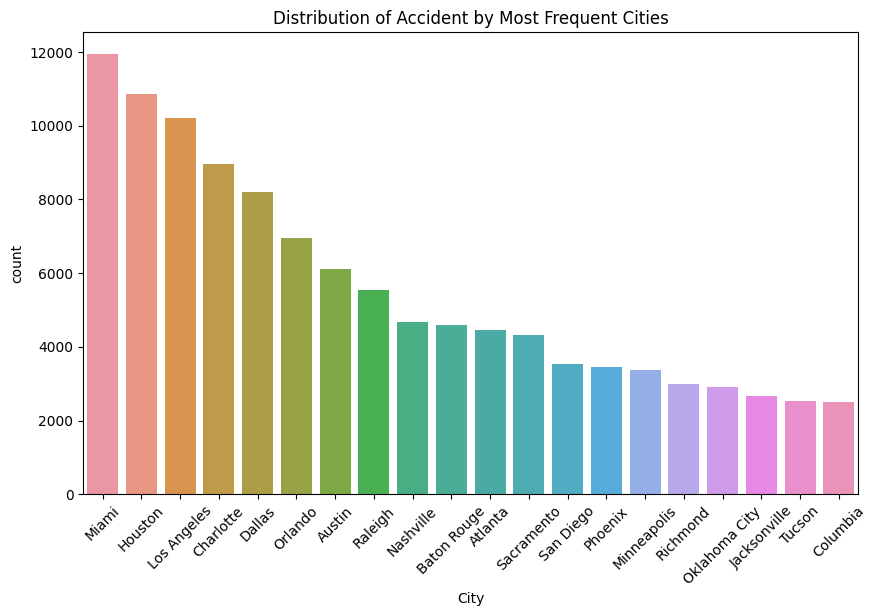

In [24]:
# Get the most frequent 20 cities
most_frequent_cities = df_traffic['City'].value_counts().head(20).index
df_most_frequent = df_traffic[df_traffic['City'].isin(most_frequent_cities)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_most_frequent, x='City', order=most_frequent_cities)
plt.xticks(rotation=45)
plt.title('Distribution of Accident by Most Frequent Cities')
plt.show()

*Although California state has the highest accident occurences, more analysis has shown that Miami in Florida and Houston in Texas has more accident occurences than cities in California*

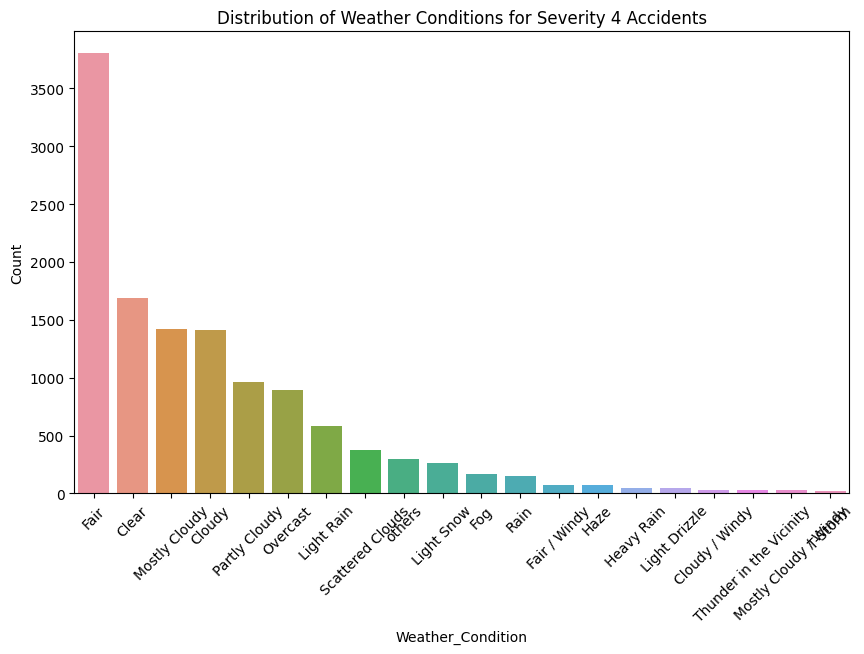

In [25]:
df_severe = df_traffic[df_traffic['Severity'] == 4]
severe_weather_condition = df_severe['Weather_Condition'].value_counts().reset_index()
severe_weather_condition.columns = ['Weather_Condition', 'Count']

# Plotting the severe weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(data=severe_weather_condition, x='Weather_Condition', y='Count')
plt.xticks(rotation=45)
plt.title('Distribution of Weather Conditions for Severity 4 Accidents')
plt.show()


*Most Accidents with severe effects on traffic occur when the weather condition is 'Fair'*

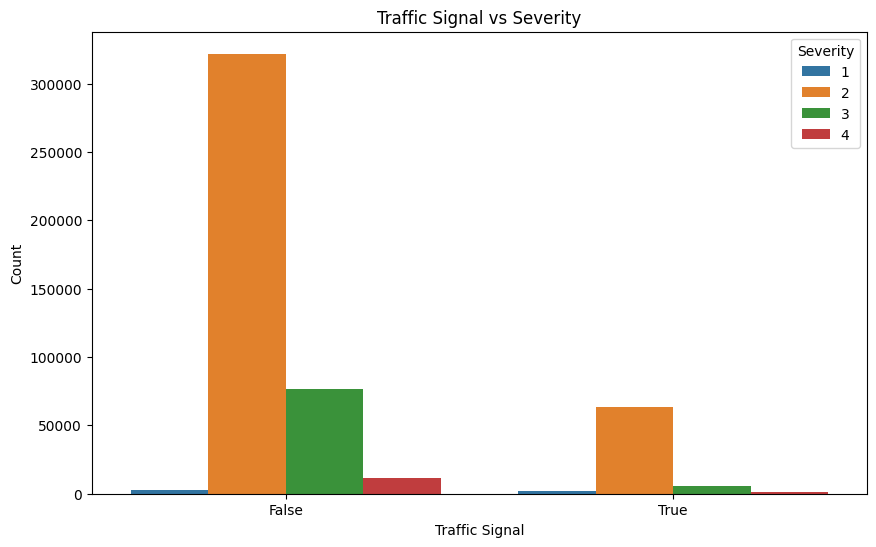

In [26]:
traffic_signal_severity = df_traffic[['Traffic_Signal', 'Severity']].value_counts().sort_values(ascending=False).head(20).reset_index()
traffic_signal_severity.columns = ['Traffic_Signal', 'Severity', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=traffic_signal_severity, x='Traffic_Signal', y='Count', hue='Severity')

plt.title('Traffic Signal vs Severity')
plt.ylabel('Count')
plt.xlabel('Traffic Signal')
plt.show()

*This shows the spread of severity in the presence and absence of Traffic Signal*

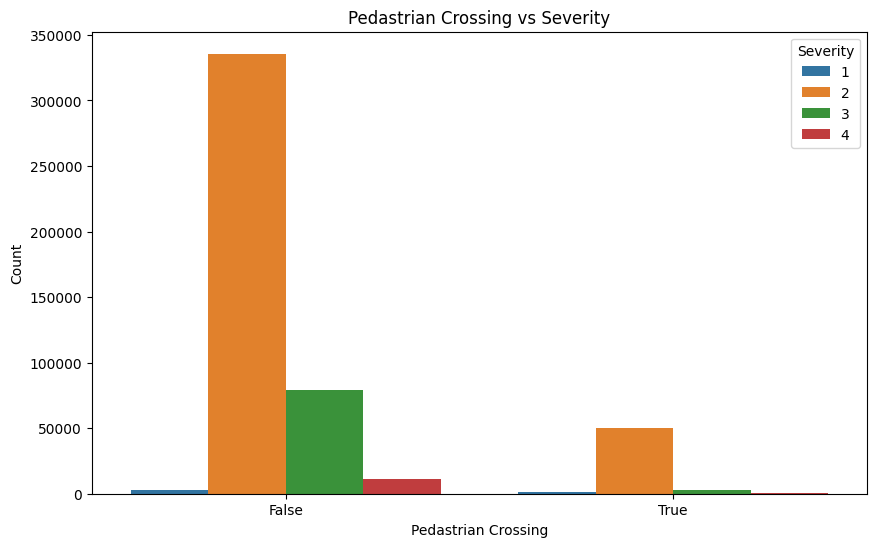

In [27]:
traffic_signal_severity = df_traffic[['Crossing', 'Severity']].value_counts().sort_values(ascending=False).head(20).reset_index()
traffic_signal_severity.columns = ['Crossing', 'Severity', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=traffic_signal_severity, x='Crossing', y='Count', hue='Severity')

plt.title('Pedastrian Crossing vs Severity')
plt.ylabel('Count')
plt.xlabel('Pedastrian Crossing')
plt.show()

*This shows the spread of severity in the presence or absence of Pedastrian Crossings.*

From the above analysis, it can be derived that many accidents occur during daytime when visibility is low and precipitation does not neccesarily increase the chance of accident occurence as most accidents occur during fair and clear weather. Factors such as presence of roundabouts, traffic signals, road bumps significantly reduce the chance of accident occurence. Finally, majority of the of accidents cause moderate Traffic(ie not too long delay)